### ***Relatório 4***
**Nome: Eduardo Schwantz**

**Mátricula: 20200683**

#**Métodos**

###**Trapézio de Chapra**

In [ ]:
def trap_chapra(f, a, b, n):
    h = (b - a) / n
    integral = 0.5 * (f(a) + f(b))

    for i in range(1, n):
        x_i = a + i * h
        integral += f(x_i)

    integral *= h
    return integral

def find_required_n(f, a, b, target_error):
    n = 2
    prev_integral = trap_chapra(f, a, b, n)
    while True:
        n*=2
        integral = trap_chapra(f, a, b, n)
        error = abs(integral - prev_integral)
        if error < target_error:
            n /= 2
            int_n = int(n)
            return int_n

        prev_integral = integral

def trap_chapraEx3(temperaturas, posicoes):
    a = posicoes[0]
    b = posicoes[-1]
    n = len(posicoes)

    h = (b - a) / (n - 1)
    integral = 0.5 * (temperaturas[0] + temperaturas[-1])

    for i in range(1, n - 1):
        integral += temperaturas[i]

    integral *= h
    return integral


###**1/3 de Simpson**

In [ ]:
def one_third_simpson(f, a, b, n):

    if n % 2 != 0:
        raise ValueError("O número de subintervalos deve ser par.")

    h = (b - a) / n
    result = f(a) + f(b)

    for i in range(1, n, 2):
        result += 4 * f(a + i * h)

    for i in range(2, n-1, 2):
        result += 2 * f(a + i * h)

    integral_approximation = (h / 3) * result
    return integral_approximation
def one_third_simpsonEx3(temperaturas, posicoes):

    a = posicoes[0]
    b = posicoes[-1]
    n = len(posicoes)

    if n % 2 != 0:
        raise ValueError("O número de subintervalos deve ser par.")

    h = (b - a) / (n - 1)
    result = temperaturas[0] + temperaturas[-1]

    for i in range(1, n - 1, 2):
        result += 4 * temperaturas[i]

    for i in range(2, n - 2, 2):
        result += 2 * temperaturas[i]

    integral_approximation = (h / 3) * result
    return integral_approximation

###**3/8 de Simpson**

In [ ]:
def three_eighth_simpson(f, a, b, n):
    if n % 3 != 0:
        raise ValueError("O número de subintervalos deve ser múltiplo de 3.")

    h = (b - a) / n
    result = f(a) + f(b)

    for i in range(1, n, 3):
        result += 3 * f(a + i * h)

    for i in range(2, n, 3):
        result += 3 * f(a + i * h)

    for i in range(3, n, 3):
        result += 2 * f(a + i * h)

    integral_approximation = (3 * h / 8) * result
    return integral_approximation

###**Euler**

In [ ]:
def euler_method(f, x0, y0, h, n):
    x_values = [x0]
    y_values = [y0]

    for _ in range(n):
        x_new = x_values[-1] + h
        y_new = y_values[-1] + h * f(x_values[-1], y_values[-1])
        x_values.append(x_new)
        y_values.append(y_new)

    return x_values, y_values

def calcular_velocidade_aceleracao(instanteS, posicaoM):
    velocidade = [0]
    aceleracao = [0]

    for i in range(1, len(instanteS)):
        delta_posicao = posicaoM[i] - posicaoM[i - 1]
        delta_tempo = instanteS[i] - instanteS[i - 1]

        velocidade.append(delta_posicao / delta_tempo)

        if delta_tempo != 0:
            aceleracao.append((velocidade[i] - velocidade[i - 1]) / delta_tempo)
        else:
            aceleracao.append(0)

    return velocidade, aceleracao

###**RK2**

In [ ]:
def rk2(f, x0, y0, h, n):
    x_values = [x0]
    y_values = [y0]

    x = x0
    y = y0

    while x < n:
        k1 = h * f(x, y)
        k2 = h * f(x + h / 2, y + k1 / 2)

        y = y + k2
        x = x + h

        x_values.append(x)
        y_values.append(y)

    return x_values, y_values


#**Questão 1**

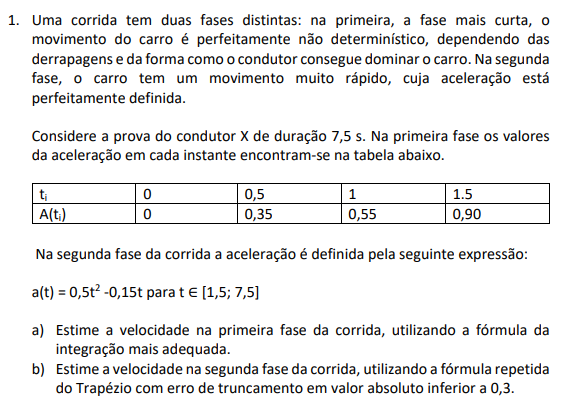

In [ ]:
def f(x):
    return 0.5 * x**2 - 0.15 * x

a = 0
b = 1.5
n = 1
first_phase = trap_chapra(f, a, b, n)
print("Velocidade estimada da primeira fase da corrida:", first_phase)
a = 1.5
b = 7.5
error = 0.3
required_n = find_required_n(f, a, b, error)
approx_integral = trap_chapra(f, a, b, required_n)
print("Número de repetições necessárias para a segunda fase com erro em 0.3:", required_n)
print("Velocidade estimada da segunda fase da corrida:", approx_integral)


Velocidade estimada da primeira fase da corrida: 0.675
Número de repetições necessárias para a segunda fase com erro em 0.3: 8
Velocidade estimada da segunda fase da corrida: 65.98124999999999


#**Questão 2**

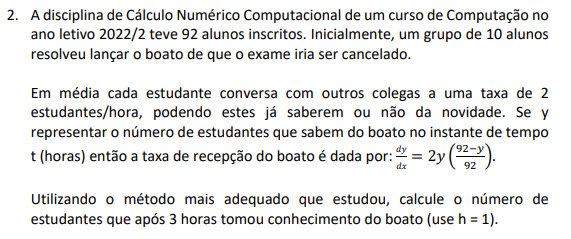

In [ ]:
def f(x, y):
    return 2 * y * ((92 - y)/92)

x0 = 0
y0 = 10
n = 3
h = 1

x_values, y_values = rk2(f, x0, y0, h, n)

for x, y in zip(x_values, y_values):
    print(f"Em {x:.0f} horas {y:.0f} estudantes saberão dos boatos.")

Em 0 horas 10 estudantes saberão dos boatos.
Em 1 horas 40 estudantes saberão dos boatos.
Em 2 horas 80 estudantes saberão dos boatos.
Em 3 horas 83 estudantes saberão dos boatos.


#**Questão 3**

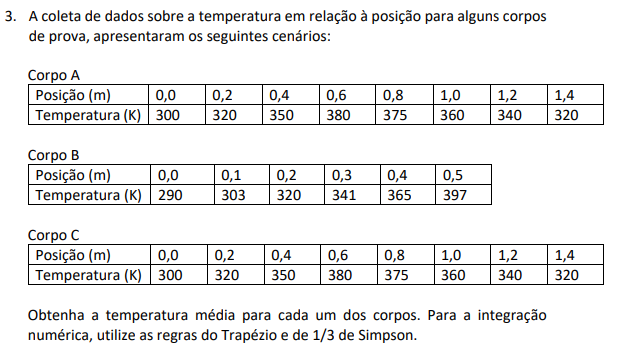

In [ ]:
# Dados para o Corpo A
posicoes_a = [0.0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4]
temperaturas_a = [300, 320, 350, 380, 375, 360, 340, 320]

# Dados para o Corpo B
posicoes_b = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5]
temperaturas_b = [290, 303, 320, 341, 365, 397]

# Dados para o Corpo C
posicoes_c = [0.0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4]
temperaturas_c = [300, 320, 350, 380, 375, 360, 340, 320]

# Corpo A
temperatura_media_a_trap = trap_chapraEx3(temperaturas_a, posicoes_a)
temperatura_media_a_simpson = one_third_simpsonEx3(temperaturas_a, posicoes_a)
print("Temperatura média do Corpo A (Trapézio):", temperatura_media_a_trap, "K")
print("Temperatura média do Corpo A (1/3 de Simpson):", temperatura_media_a_simpson, "K")
print("\n")
# Corpo B
temperatura_media_b_trap = trap_chapraEx3(temperaturas_b, posicoes_b)
temperatura_media_b_simpson = one_third_simpsonEx3(temperaturas_b, posicoes_b)
print("Temperatura média do Corpo B (Trapézio):", temperatura_media_b_trap, "K")
print("Temperatura média do Corpo B (1/3 de Simpson):", temperatura_media_b_simpson, "K")
print("\n")
# Corpo C
temperatura_media_c_trap = trap_chapraEx3(temperaturas_c, posicoes_c)
temperatura_media_c_simpson = one_third_simpsonEx3(temperaturas_c, posicoes_c)
print("Temperatura média do Corpo C (Trapézio):", temperatura_media_c_trap, "K")
print("Temperatura média do Corpo C (1/3 de Simpson):", temperatura_media_c_simpson, "K")


Temperatura média do Corpo A (Trapézio): 486.99999999999994 K
Temperatura média do Corpo A (1/3 de Simpson): 420.6666666666667 K


Temperatura média do Corpo B (Trapézio): 167.25 K
Temperatura média do Corpo B (1/3 de Simpson): 130.1 K


Temperatura média do Corpo C (Trapézio): 486.99999999999994 K
Temperatura média do Corpo C (1/3 de Simpson): 420.6666666666667 K


#**Questão 4**

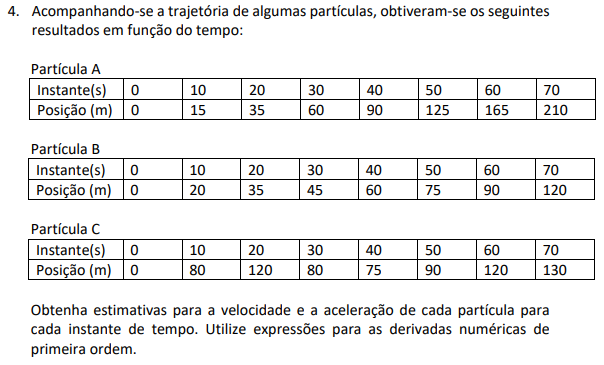

In [ ]:
# Dados para o Partícula A
instanteS_a = [0, 10, 20, 30, 40, 50, 60, 70]
posicaoM_a = [0, 15, 35, 60, 90, 125, 165, 210]

# Dados para o Partícula B
instanteS_b = [0, 10, 20, 30, 40, 50, 60, 70]
posicaoM_b = [0, 20, 35, 45, 60, 75, 90, 120]

# Dados para o Partícula C
instanteS_c = [0, 10, 20, 30, 40, 50, 60, 70]
posicaoM_c = [0, 80, 120, 80, 75, 90, 120, 130]

velocidade_a, aceleracao_a = calcular_velocidade_aceleracao(instanteS_a, posicaoM_a)
velocidade_b, aceleracao_b = calcular_velocidade_aceleracao(instanteS_b, posicaoM_b)
velocidade_c, aceleracao_c = calcular_velocidade_aceleracao(instanteS_c, posicaoM_c)

print("Partícula A:")
for t, v, a in zip(instanteS_a, velocidade_a, aceleracao_a):
    if t != 70:
        print(f"Instante: {t} s, Velocidade: {v:.2f} m/s, Aceleração: {a:.2f} m/s²")
print("\nPartícula B:")
for t, v, a in zip(instanteS_b, velocidade_b, aceleracao_b):
    if t != 70:
        print(f"Instante: {t} s, Velocidade: {v:.2f} m/s, Aceleração: {a:.2f} m/s²")

print("\nPartícula C:")
for t, v, a in zip(instanteS_c, velocidade_c, aceleracao_c):
    if t != 70:
        print(f"Instante: {t} s, Velocidade: {v:.2f} m/s, Aceleração: {a:.2f} m/s²")


Partícula A:
Instante: 0 s, Velocidade: 0.00 m/s, Aceleração: 0.00 m/s²
Instante: 10 s, Velocidade: 1.50 m/s, Aceleração: 0.15 m/s²
Instante: 20 s, Velocidade: 2.00 m/s, Aceleração: 0.05 m/s²
Instante: 30 s, Velocidade: 2.50 m/s, Aceleração: 0.05 m/s²
Instante: 40 s, Velocidade: 3.00 m/s, Aceleração: 0.05 m/s²
Instante: 50 s, Velocidade: 3.50 m/s, Aceleração: 0.05 m/s²
Instante: 60 s, Velocidade: 4.00 m/s, Aceleração: 0.05 m/s²

Partícula B:
Instante: 0 s, Velocidade: 0.00 m/s, Aceleração: 0.00 m/s²
Instante: 10 s, Velocidade: 2.00 m/s, Aceleração: 0.20 m/s²
Instante: 20 s, Velocidade: 1.50 m/s, Aceleração: -0.05 m/s²
Instante: 30 s, Velocidade: 1.00 m/s, Aceleração: -0.05 m/s²
Instante: 40 s, Velocidade: 1.50 m/s, Aceleração: 0.05 m/s²
Instante: 50 s, Velocidade: 1.50 m/s, Aceleração: 0.00 m/s²
Instante: 60 s, Velocidade: 1.50 m/s, Aceleração: 0.00 m/s²

Partícula C:
Instante: 0 s, Velocidade: 0.00 m/s, Aceleração: 0.00 m/s²
Instante: 10 s, Velocidade: 8.00 m/s, Aceleração: 0.80 m/s²
